# Climate Change Scenarios and Commitments with FaIR
______________________________________________

## Introduction

In this lab, we are going to investigate simulations using FaIR forced with different types of scenarios. We will use these scenarios to explore possible futures and our climate change commitments.

To start we are going to move beyond our examination of the historical time period and take a look at future projections following the Representative Concentration Pathways (RCPs).

First, let's import our packages:

In [3]:
import fair
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

## RCPs and Multi-species mode

The `Multi-species` mode is the the mode that we employed for most of Lab 7 and what we will use to run the RCP scenarios. Let's familiarize ourselves with what this mode includes:

* The emissions dataset is a (736, 40) array of inputs (there are 736 rows, corresponding to the number of years (1765-2500)). These emissions are the boundary conditions that are needed to run FaIR,
* `useMultigas=True` is the default option when we run FaIR

### Emissions
The index order and units of the columns in the input emissions array are as follows:

Index     | Species        | Units                                          
-----------|----------------|------
0         | Year           | year 
1         | CO<sub>2</sub>-fossil  | GtC/yr                                               
2         | CO<sub>2</sub>-landuse | GtC/yr                                               
3         | CH<sub>4</sub>         | Mt/yr 
4         | N<sub>2</sub>O         | MtN<sub>2</sub>/yr 
5         | SOx            | MtS/yr 
6         | CO             | Mt/yr 
7         | NMVOC          | Mt/yr 
8         | NOx            | MtN/yr 
9         | BC             | Mt/yr 
10        | OC             | Mt/yr 
11        | NH<sub>3</sub>         | Mt/yr 
12        | CF<sub>4</sub>         | kt/yr 
13        | C<sub>2</sub>F<sub>6</sub>     | kt/yr   
14        | C<sub>6</sub>F<sub>14</sub>  | kt/yr   
15        | HFC23          | kt/yr   
16        | HFC32          | kt/yr   
17        | HFC43-10       | kt/yr   
18        | HFC125         | kt/yr   
19        | HFC134a        | kt/yr   
20        | HFC143a        | kt/yr   
21        | HFC227ea       | kt/yr  
22        | HFC245fa       | kt/yr   
23        | SF<sub>6</sub>         | kt/yr   
24        | CFC11          | kt/yr   
25        | CFC12          | kt/yr   
26        | CFC113         | kt/yr   
27        | CFC114         | kt/yr   
28        | CFC115         | kt/yr   
29        | CCl<sub>4</sub>        | kt/yr   
30        | Methyl chloroform | kt/yr   
31        | HCFC22         | kt/yr    
32        | HCFC141b       | kt/yr    
33        | HCFC142b       | kt/yr   
34        | Halon 1211     | kt/yr   
35        | Halon 1202     | kt/yr   
36        | Halon 1301     | kt/yr   
37        | Halon 2401     | kt/yr   
38        | CH<sub>3</sub>Br       | kt/yr
39        | CH<sub>3</sub>Cl       | kt/yr

The index order of the columns follows that of the RCP datasets at http://www.pik-potsdam.de/~mmalte/rcps/.

Now, let's take a look at these input emissions by loading our RCP modules:

In [5]:
# get RCP modules
from fair.RCPs import rcp26, rcp45, rcp60, rcp85

Let's check the shape of our emissions array to make sure we have a 736x40 array.

In [3]:
# print the shape of the emissions array
print(rcp26.Emissions.emissions.shape)

(736, 40)


You can take a look at all the column names by placing your cursor at the end of the line and clicking `tab`.

In [5]:
rcp26.Emissions.

Ok, great!

Let's plot the emissions of the first four columns of well-mixed greenhouse gases (GHGs; see table above - note the first column in the years): 
- CO<sub>2</sub> from fossil fuels 
- CO<sub>2</sub> from land use change (e.g. deforestation) 
- CH<sub>4</sub>
- N<sub>2</sub>O

You can access the array using indexing:

e.g.
```
year = rcp26.Emissions[:,0]
```

or using the column names
```
year = rcp26.Emissions.year
```

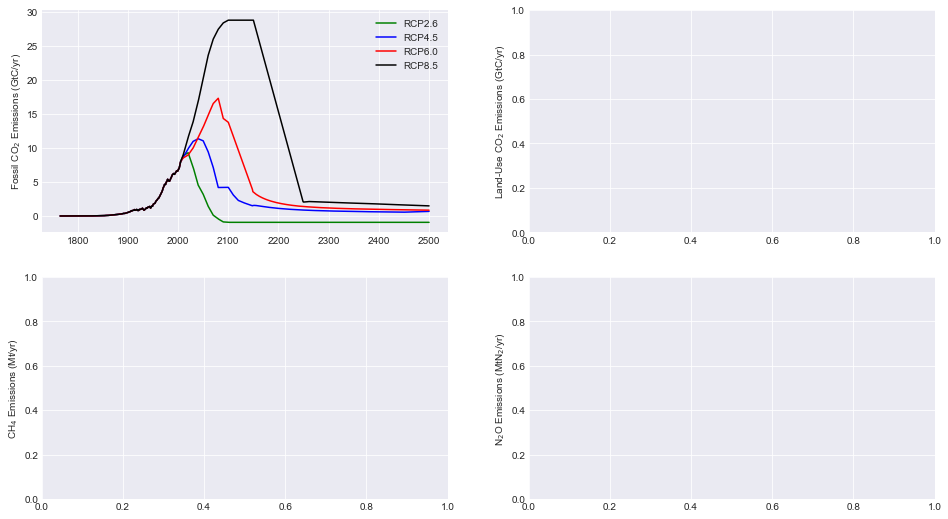

In [6]:
# plot emissions using 2x2 subplots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Fossil CO2 emissions
ax1.plot(rcp26.Emissions.year, rcp26.Emissions.co2_fossil, color='green', label='RCP2.6')
ax1.plot(rcp45.Emissions.year, rcp45.Emissions.co2_fossil, color='blue', label='RCP4.5')
ax1.plot(rcp60.Emissions.year, rcp60.Emissions.co2_fossil, color='red', label='RCP6.0')
ax1.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil, color='black', label='RCP8.5')
ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC/yr)')
ax1.legend()

# Land-use CO2 emissions
#ax2.plot(rcp26.Emissions.year, , color='green', label='RCP2.6')
#ax2.plot(rcp45.Emissions.year, , color='blue', label='RCP4.5')
#ax2.plot(rcp60.Emissions.year, , color='red', label='RCP6.0')
#ax2.plot(rcp85.Emissions.year, , color='black', label='RCP8.5')
ax2.set_ylabel('Land-Use CO$_2$ Emissions (GtC/yr)')

# Methane
#ax3.plot(rcp26.Emissions.year, , color='green', label='RCP2.6')
#ax3.plot(rcp45.Emissions.year, , color='blue', label='RCP4.5')
#ax3.plot(rcp60.Emissions.year, , color='red', label='RCP6.0')
#ax3.plot(rcp85.Emissions.year, , color='black', label='RCP8.5')
ax3.set_ylabel('CH$_4$ Emissions (Mt/yr)')

# Nitrous Oxide
#ax4.plot(rcp26.Emissions.year, , color='green', label='RCP2.6')
#ax4.plot(rcp45.Emissions.year, , color='blue', label='RCP4.5')
#ax4.plot(rcp60.Emissions.year, , color='red', label='RCP6.0')
#ax4.plot(rcp85.Emissions.year, , color='black', label='RCP8.5')
ax4.set_ylabel('N$_2$O Emissions (MtN$_2$/yr)')

### **Remember: we haven't actually run the FaIR model yet - the emissions are the inputs we need to run the model in the `multi-gas` mode.**
___________________

*Reflection question*: what do you notice about RCP2.6? How is it notably different from the other scenarios (besides, being the lowest carbon scenario)?


## RCP Simulations

Now, let's run the model to get the concentration, radiative forcing and temperature anomaly outputs using the RCP emisssions.

In [7]:
# basic RCP runs
C26, F26, T26 = fair.forward.fair_scm(emissions=rcp26.Emissions.emissions)
C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp60.Emissions.emissions)
C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

Let's summarize the output in a figure - we will plot fossil CO<sub>2</sub> emissions, CO<sub>2</sub> concentrations, the total radiative forcing and the temperature anomaly for each scenario.

**Note: let's just plot for years 1765-2100.**

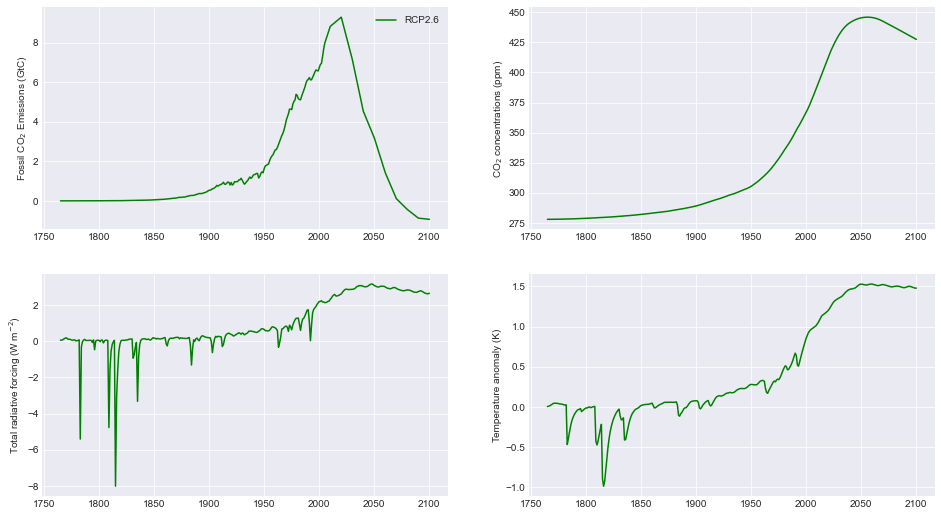

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# RCP2.6
ax1.plot(rcp26.Emissions.year[:336], rcp26.Emissions.co2_fossil[:336], color='green', label='RCP2.6')
# just show CO2 conc.
ax2.plot(rcp26.Emissions.year[:336], C26[:336, 0], color='green')
# sum over axis 1 to get total ERF
ax3.plot(rcp26.Emissions.year[:336], np.sum(F26[:336,:], axis=1), color='green')
ax4.plot(rcp26.Emissions.year[:336], T26[:336], color='green')

# RCP4.5
#...fill in code for plot...

# RCP6.0
#...fill in code for plot...

# RCP8.5
#...fill in code for plot...

# labels
ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

## Carbon Budget

Now, we are going to use FaIR to reproduce the [IPCC Sixth Assessment Report Working Group I Summary for Policy-Makers Figure 10](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM_final.pdf). This figure highlights the extent to which global mean temperatures are determined by cumulative CO$_2$ emissions. **Every tonne matters!**

First, we need to determine the cumulative CO<sub>2</sub> emissions as a function of time for the x-axis and then we will plot the corresponding temperature anomalies on the y-axis.

Note that the CO<sub>2</sub> emissions in FaIR are in GtC - to create a plot similar to SPM.10, we need to convert to GtCO<sub>2</sub>. Recall from Assignment 2 that this conversion factor is simply the molecular mass of CO<sub>2</sub> divided by the molecular mass of C.

In [9]:
# compute cumulative CO$_2$ emissions (in GtCO2)

Eco2_rcp26 = np.cumsum(rcp26.Emissions.co2) #muliply by conversion factor
#Eco2_rcp45 = 
#Eco2_rcp60 = 
#Eco2_rcp85 = 

No handles with labels found to put in legend.


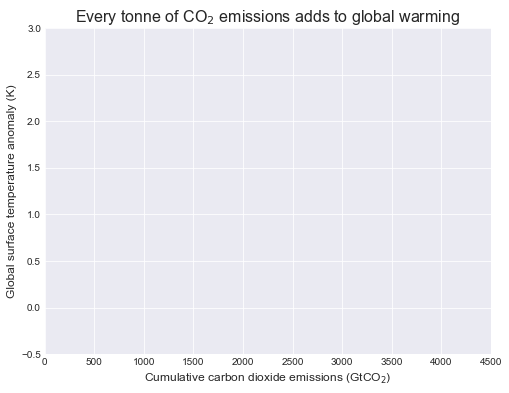

In [4]:
# plot only from 1850-2050

year_start = 85 #1850
year_mid = 255 #2019
year_end = 286 #2050

plt.figure(figsize=(8,6))

# Historical
plt.scatter(Eco2_rcp26[year_start:year_mid],T26[year_start:year_mid],color='k',label='Historical')

# RCP2.6
#plt.scatter(...,color='b',label='RCP2.6')

# RCP4.5
#plt.scatter(,color='orange',label='RCP4.5')

# RCP6.0
#plt.scatter(,color='r',label='RCP6.0')

# RCP8.5
#plt.scatter(,color='purple',label='RCP8.5')
plt.xlim(0,4500)
plt.ylim(-0.5,3)

#add labels, etc.
plt.ylabel('Global surface temperature anomaly (K)',fontsize=12)
plt.xlabel('Cumulative carbon dioxide emissions (GtCO$_2$)',fontsize=12)
plt.title('Every tonne of CO$_2$ emissions adds to global warming', fontsize=16)
plt.legend()

plt.savefig("Fig1.png")

## Climate Change Commitments

Now, let's imagine that the Paris Agreement is an ultimate success and CO<sub>2</sub> emissions suddenly drop to zero in the year 2050. This type of experiment helps us to conceptualize the magnitude of climate change that we are already commited to based on our previous emissions.

Note that one of the key considerations with these types of experiments is that the carbon cycle and ocean thermal response will not be in their pre-industrial state.

From an experimental perspective, this is what we will do:
- 

From a coding perspective, there is an extra tuple element (`restart`) in the call to `fair_scm`. To activate, set the `restart_out = True` keyword in the first run, and `restart_in` keyword in the second run.

Currently, this is only possible when going from a CO2-only run to a CO2-only run, or a multi-forcing run to a CO2-only run. In this example we will run from 1765 to 2050 with all forcing agents under the RCP4.5 scenario (one of the more plausible scenarios based on current policies), and then investigate the totally hypothetical scenario of a zeroing of CO2 emissions from 2050 onwards, with a constant non-CO2 radiative forcing.

There are 4 steps we will take to do this experiment:

In [6]:
# Going from all-forcing to CO2 only. Note natural forcing turned off for simplicity.

# STEP 1:
# Run RCP4.5 scenario up to year 2050
C1, F1, T1, restart = fair.forward.fair_scm(
    emissions   = rcp45.Emissions.emissions[:285,:], #only up to year 2050
    natural     = fair.ancil.natural.Emissions.emissions[:285,:],
    restart_out = True,
    F_solar     = 0.,
    F_volcanic  = 0.,
    tropO3_forcing = 'constant',  # fancy options don't work with restart
)

# STEP 2:
# construct constant non-CO2 forcing from 2050 to 2500
nonco2_rf = np.sum(F1[-1,1:]) * np.ones(451)

# STEP 3:
# restart run and continue integrating forward to 2500 with zero CO2 emissions and constant non-CO2 forcing
C2, F2, T2 = fair.forward.fair_scm(
    emissions   = 0.,
    other_rf    = nonco2_rf,
    useMultigas = False,
    restart_in  = restart
)

#STEP 4:
# do a normal RCP4.5 run for comparison
C45, F45, T45 = fair.forward.fair_scm(
    emissions  = rcp45.Emissions.emissions,
    F_solar    = 0.,
    F_volcanic = 0.,
    tropO3_forcing = 'constant', 
)

Now, let's plot the hypothetical zero emissions scenario alongside the standard RCP4.5 scenario:

No handles with labels found to put in legend.


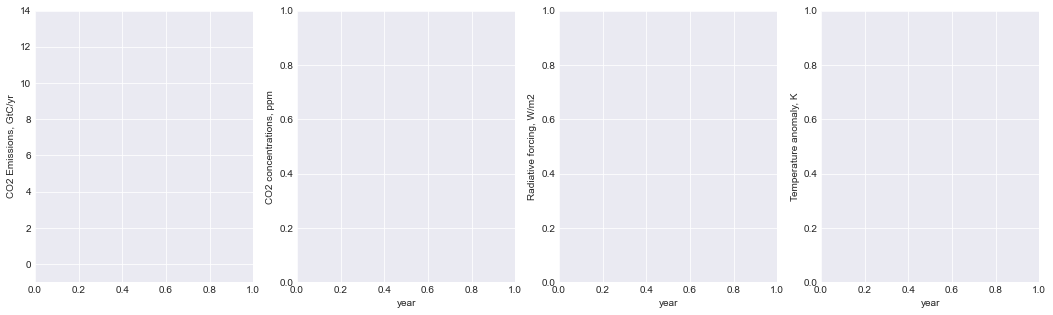

In [7]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# CO2 emissions
ax1.plot(rcp45.Emissions.year, np.concatenate((rcp45.Emissions.co2[:285],np.zeros(451))), color='blue',
         label='zero CO2 emissions at 2050')
ax1.plot(rcp45.Emissions.year, rcp45.Emissions.co2, color='red',
         label='RCP4.5')

# CO2 concentration
ax2.plot(rcp45.Emissions.year, np.concatenate((C1[:,0], C2)), color='blue',
         label='zero CO2 emissions, constant non-CO2 forcing')
ax2.plot(rcp45.Emissions.year, C45[:,0], color='red', label='RCP4.5')

# total RF
ax3.plot(rcp45.Emissions.year, np.concatenate((np.sum(F1,axis=1), F2)), color='blue', 
         label='Emissions driven')
ax3.plot(rcp45.Emissions.year, np.sum(F45,axis=1), color='red', label='RCP4.5')

# temperature anomaly
ax4.plot(rcp45.Emissions.year, np.concatenate((T1, T2)), color='blue', 
         label='Emissions driven')
ax4.plot(rcp45.Emissions.year, T45, color='red', label='RCP4.5')

# labels, etc.
ax1.set_ylabel('CO2 Emissions, GtC/yr')
ax1.set_ylim(-1,14)
ax2.set_ylabel('CO2 concentrations, ppm')
ax3.set_ylabel('Radiative forcing, W/m2')
ax4.set_ylabel('Temperature anomaly, K')

ax2.set_xlabel('year')
ax3.set_xlabel('year')
ax4.set_xlabel('year')
ax1.legend(loc='upper left')

Looks like we are able to roughly stabilize the climate just above 2$^{\circ}$C. 

Using FaIR what year would we need to achieve zero emissions to keep temperatures at or below 2$^{\circ}$C, 1.5$^{\circ}$C?

What happens if you set the` nonco2_rf` to zero as well at the year 2050?

## Geoengineering

Finally, let's imagine a geoengineering example in which we cannot mitigate CO2 emissions entirely and we want to avoide the worst impacts of climate change.

Using the same example as above, we will maintain our CO2 emissions following the RCP4.5 scenarion and also try to reduce temperatures further using **solar radiation management (SRM)**. We can assume that SRM acts as a negative radiative forcing on the climate.

We will construct the SRM radiative forcing to be half the radiative forcing due to CO2 in the RCP4.5 scenario. We will also keep the constant non-co2 radiative forcing as before.

In [8]:
# Going from all-forcing to CO2 only. Note natural forcing turned off for simplicity.

# STEP 1:
# Run RCP4.5 scenario up to year 2050
C1srm, F1srm, T1srm, restart = fair.forward.fair_scm(
    emissions   = rcp45.Emissions.emissions[:285,:], #only up to year 2050
    natural     = fair.ancil.natural.Emissions.emissions[:285,:],
    restart_out = True,
    F_solar     = 0.,
    F_volcanic  = 0.,
    tropO3_forcing = 'constant',  # fancy options don't work with restart
)

# STEP 2:
# construct SRM forcing by reducing RF by half the CO2 RF from 2050 to 2500 + constant non-co2 forcing
geo_rf = -0.5*(F45[285:,0]) + np.sum(F1srm[-1,1:]) * np.ones(451)

# STEP 3:
# restart run and continue integrating forward to 2500 with zero CO2 emissions and constant non-CO2 forcing
C2srm, F2srm, T2srm = fair.forward.fair_scm(
    emissions   = rcp45.Emissions.co2[285:],
    other_rf    = geo_rf,
    useMultigas = False,
    restart_in  = restart
)

#STEP 4:
# do a normal RCP4.5 run for comparison
C45, F45, T45 = fair.forward.fair_scm(
    emissions  = rcp45.Emissions.emissions,
    F_solar    = 0.,
    F_volcanic = 0.,
    tropO3_forcing = 'constant', 
)

Now, plot the four panels as above:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


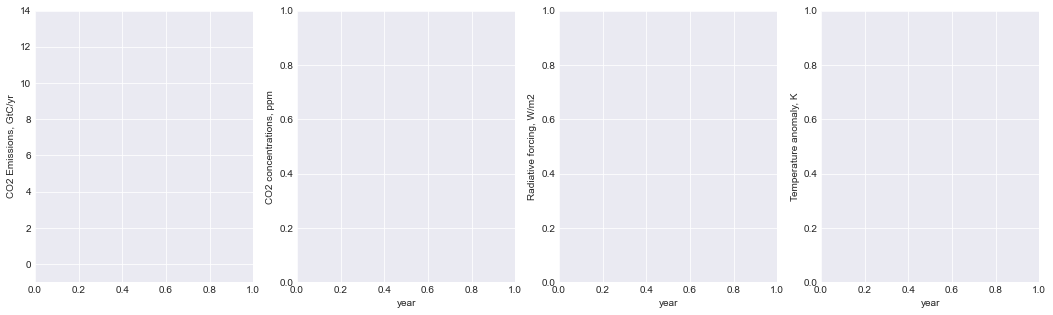

In [9]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# CO2 emissions
#ax1.plot(, color='red', label='RCP4.5')

# CO2 concentrations
#ax2.plot(rcp45.Emissions.year, ), color='blue',label='RCP4.5 + SRM')
#ax2.plot(rcp45.Emissions.year, , color='red',label='RCP4.5')

# total RF
#ax3.plot(rcp45.Emissions.year, ), color='blue', 
#         label='Emissions driven')
#ax3.plot(rcp45.Emissions.year, , color='red', label='RCP4.5')

# temperature anomaly
#ax4.plot(rcp45.Emissions.year, , color='blue', 
#         label='Emissions driven')
#ax4.plot(rcp45.Emissions.year, , color='red', label='RCP4.5')

# labels, etc.
ax1.set_ylabel('CO2 Emissions, GtC/yr')
ax1.set_ylim(-1,14)
ax2.set_ylabel('CO2 concentrations, ppm')
ax3.set_ylabel('Radiative forcing, W/m2')
ax4.set_ylabel('Temperature anomaly, K')

ax2.set_xlabel('year')
ax3.set_xlabel('year')
ax4.set_xlabel('year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')